In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale, PolynomialFeatures
import sklearn.linear_model as skl_lm
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Cargamos los datos

Cargamos los conjuntos de datos que vamos a usar

Los conjuntos de datos están en la web del libro (pero ya están descargados)
http://www-bcf.usc.edu/~gareth/ISL/data.html

In [2]:
advertising = pd.read_csv('advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [3]:
auto = pd.read_csv('auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [4]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.describe()

mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
25%    16.892500   0.000000   0.000000   3.000000   2.0000  
50%    17.710000   0.000000   0.000000   4.000000   2.0000  
75%    18.900000   1.000000   1.000000   4.000000   4.0000  
max    22.900000   1.000000   1.000000   5.000000   8.0000

In [5]:
est = smf.ols('mpg ~ hp + am', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     52.02
Date:                Fri, 25 May 2018   Prob (F-statistic):           2.55e-10
Time:                        20:17:48   Log-Likelihood:                -78.003
No. Observations:                  32   AIC:                             162.0
Df Residuals:                      29   BIC:                             166.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5849      1.425     18.655      0.000      23.670      29.500
hp            -0.0589      0.008     -7.495      0.000      -0.075      -0.043
am             5.2771      1.080      4.888      0.000       3.069       7.485
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.805
Skew:                           0.117   Prob(JB):                        0.669
Kurtosis:                       2.259   Cond. No.                         495.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
est = smf.ols('mpg ~ hp', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Fri, 25 May 2018   Prob (F-statistic):           1.79e-07
Time:                        20:17:49   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
est = smf.ols('mpg ~ am + hp + np.power(hp,2)', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     43.14
Date:                Fri, 25 May 2018   Prob (F-statistic):           1.25e-10
Time:                        20:17:50   Log-Likelihood:                -74.750
No. Observations:                  32   AIC:                             157.5
Df Residuals:                      28   BIC:                             163.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.7759      3.147     10.731      0.000      27.329      40.223
am                  3.7512      1.163      3.224      0.003       1.368       6.135
hp                 -0.1485      0.036     -4.081      0.000      -0.223      -0.074
np.power(hp, 2)     0.0003      0.000      2.513      0.018    4.66e-05       0.000
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.912
Skew:                           0.593   Prob(JB):                        0.384
Kurtosis:                       2.833   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
est = smf.ols('mpg ~ wt', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Fri, 25 May 2018   Prob (F-statistic):           1.29e-10
Time:                        20:18:17   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
est = smf.ols('mpg ~ hp', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Fri, 25 May 2018   Prob (F-statistic):           1.79e-07
Time:                        20:18:21   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
est = smf.ols('mpg ~ wt + hp', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Fri, 25 May 2018   Prob (F-statistic):           9.11e-12
Time:                        20:19:19   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
est = smf.ols('mpg ~ wt + hp + am', mtcars).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     48.96
Date:                Fri, 25 May 2018   Prob (F-statistic):           2.91e-11
Time:                        20:19:03   Log-Likelihood:                -73.067
No. Observations:                  32   AIC:                             154.1
Df Residuals:                      28   BIC:                             160.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0029      2.643     12.867      0.000      28.590      39.416
wt            -2.8786      0.905     -3.181      0.004      -4.732      -1.025
hp            -0.0375      0.010     -3.902      0.001      -0.057      -0.018
am             2.0837      1.376      1.514      0.141      -0.736       4.903
==============================================================================
Omnibus:                        2.810   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                2.339
Skew:                           0.654   Prob(JB):                        0.311
Kurtosis:                       2.790   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [17]:
auto = auto.sort_values(by='weight')

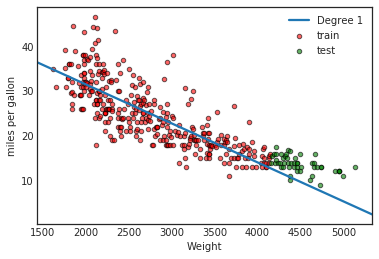

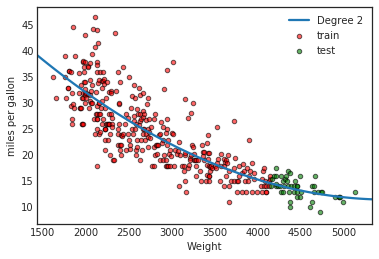

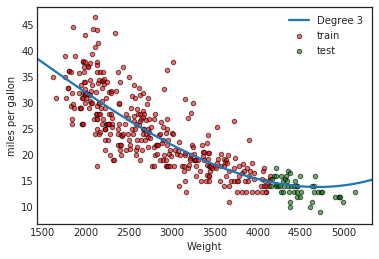

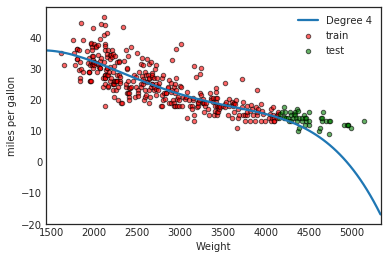

In [20]:
max_order = 5
split_index = len(auto) - 50

X = auto[['weight']].as_matrix()
y = auto['mpg']
for order in range(1,max_order):
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    plt.scatter(X_train[:,0], y_train, 
                facecolors='r', edgecolors='k', alpha=0.6, s=20,
                label='train')
    plt.scatter(X_test[:,0], y_test,
                facecolors='g', edgecolors='k', alpha=0.6, s=20,
                label='test')
    sns.regplot(X_train[:,0], y_train, ci=None, label='Degree %d'%order, order=order, scatter=False)
    plt.legend()
    plt.xlabel('Weight')
    plt.ylabel('miles per gallon')
    plt.show()

In [24]:
max_order = 10
split_index = len(auto) - 50

y = auto['mpg']

for order in range(1,max_order):
    poly = PolynomialFeatures(order)
    X = poly.fit_transform( auto[['weight']])
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    regr = skl_lm.LinearRegression()
    regr.fit(X_train,y_train)
    print(order,':',regr.score(X_train, y_train),
                ',',regr.score(X_test, y_test))

1 : 0.6245017327009947 , -4.403133687730371
2 : 0.6330580950233855 , 0.24885407582470773
3 : 0.6331845695900851 , 0.016582843525709268
4 : 0.6339506722295546 , -9.266508373164731
5 : 0.6336566369774657 , -11.531181597032832
6 : 0.6335972009576665 , -6.584698997200653
7 : 0.6337247577420551 , -0.8850799442519941
8 : 0.6338338124194445 , -103.83810207684365
9 : 0.6336048101746206 , -871.2322835253727


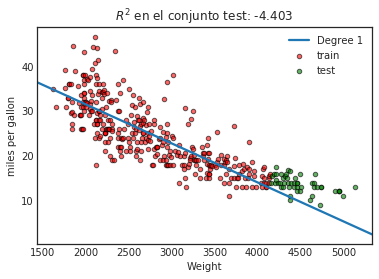

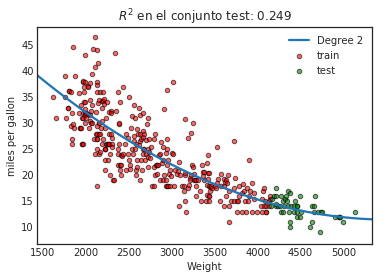

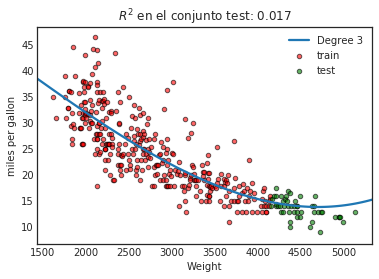

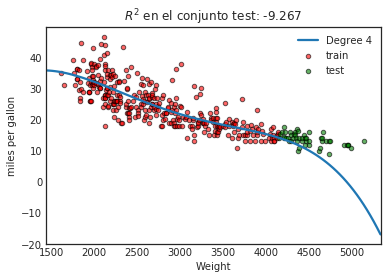

In [28]:
max_order = 5
split_index = len(auto) - 50

y = auto['mpg']
for order in range(1,max_order):
    poly = PolynomialFeatures(order)
    X = poly.fit_transform( auto[['weight']])
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    regr = skl_lm.LinearRegression()
    regr.fit(X_train,y_train)
    score_train = regr.score(X_train, y_train)
    score_test  = regr.score(X_test, y_test)
    
    X = auto[['weight']].as_matrix()
    X_train, X_test = X[:split_index,:], X[split_index:,:]
    y_train, y_test = y[:split_index], y[split_index:]
    plt.scatter(X_train[:,0], y_train, 
                facecolors='r', edgecolors='k', alpha=0.6, s=20,
                label='train')
    plt.scatter(X_test[:,0], y_test,
                facecolors='g', edgecolors='k', alpha=0.6, s=20,
                label='test')
    sns.regplot(X_train[:,0], y_train, ci=None, label='Degree %d'%order, order=order, scatter=False)
    plt.legend()
    plt.xlabel('Weight')
    plt.ylabel('miles per gallon')
    plt.title('$R^2$ en el conjunto test: %.3f'%score_test)
    plt.show()

In [34]:
for order in [1,2,3,4,5]:
    poly = PolynomialFeatures(order)
    X = poly.fit_transform(auto[['weight']])
    y = auto['mpg']

    regr = skl_lm.LinearRegression()

    regr.fit(X,y)

    print('grado',order,':', regr.predict(poly.fit_transform(5500)))

grado 1 : [4.1561406]
grado 2 : [11.85070905]
grado 3 : [11.99429334]
grado 4 : [8.8524468]
grado 5 : [9.5749791]
